In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
data = pd.read_csv("sample_data.csv",encoding='euc-kr')
data

,seoul_gu,dog,parking_lot,park_width_per_person
0,강남구,27180,61,3.81
1,강동구,20295,23,2.80
2,강북구,15346,36,5.93
3,강서구,26362,45,3.82
4,관악구,21199,20,3.59
5,광진구,16567,26,2.33
6,구로구,15279,26,2.62
7,금천구,9982,42,1.35
8,노원구,22590,26,2.38
9,도봉구,16729,16,2.31


In [10]:
# scaling 위해서서울시 구 이름 제외
sample = data.iloc[:,1:5] 
sample.head()

,dog,parking_lot,park_width_per_person
0,27180,61,3.81
1,20295,23,2.80
2,15346,36,5.93
3,26362,45,3.82
4,21199,20,3.59


In [11]:
# standard scaling
np_sample = sample.to_numpy()
scaler = StandardScaler()
scaler.fit(np_sample)
scaled_np_sample = scaler.transform(np_sample)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


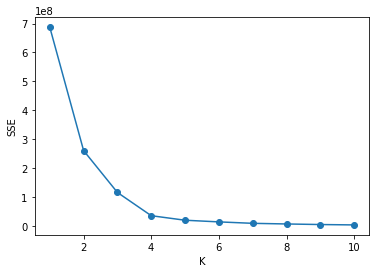

In [12]:
#엘보우 방법(k값 구하기)
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(np_sample)

In [13]:
# kmeans clustering / n_cluster 가 k값
model = KMeans(n_clusters=4)
model.fit(scaled_np_sample)
labels = model.predict(scaled_np_sample)

In [14]:
# 원본 데이터에 군집화 된 Clusters 열 추가
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = labels

In [15]:
data_with_clusters.head()
data_with_clusters.to_csv("data_kmean_result.csv",encoding='euc-kr')

In [16]:
#scaling한 data np 형태에서 dataframe 형태로 변환
df_scaled_sample = pd.DataFrame(scaled_np_sample)
df_scaled_sample.to_csv("df_scaled_sample.csv",encoding='euc-kr')


In [17]:
#실루엣 검중
score_samples = silhouette_samples(df_scaled_sample, data_with_clusters['Clusters'])
data_with_clusters['silhoutte_coeff'] = score_samples
average_score = silhouette_score(df_scaled_sample, data_with_clusters['Clusters'])
print(average_score)
print(data_with_clusters.groupby('Clusters')['silhoutte_coeff'].mean())


0.38121766625647896
Clusters
0    0.145819
1    0.417794
2    0.136490
3    0.669382
Name: silhoutte_coeff, dtype: float64


In [18]:
#원본 데이터(dataframe)에서 서울시 구 제외하고 dataframe을 array 형태로 변경
sample2 = data.drop(["seoul_gu"],axis=1)
np_sample2 = sample2.to_numpy()
np_sample2

array([[2.7180e+04, 6.1000e+01, 3.8100e+00],
       [2.0295e+04, 2.3000e+01, 2.8000e+00],
       [1.5346e+04, 3.6000e+01, 5.9300e+00],
       [2.6362e+04, 4.5000e+01, 3.8200e+00],
       [2.1199e+04, 2.0000e+01, 3.5900e+00],
       [1.6567e+04, 2.6000e+01, 2.3300e+00],
       [1.5279e+04, 2.6000e+01, 2.6200e+00],
       [9.9820e+03, 4.2000e+01, 1.3500e+00],
       [2.2590e+04, 2.6000e+01, 2.3800e+00],
       [1.6729e+04, 1.6000e+01, 2.3100e+00],
       [1.5486e+04, 3.6000e+01, 2.1000e+00],
       [1.5286e+04, 2.3000e+01, 4.9200e+00],
       [1.8445e+04, 3.5000e+01, 7.3000e+00],
       [1.4605e+04, 8.0000e+00, 3.0800e+00],
       [1.9186e+04, 3.3000e+01, 2.3800e+00],
       [1.3568e+04, 5.0000e+01, 3.2500e+00],
       [1.9535e+04, 1.3000e+01, 3.3800e+00],
       [2.7408e+04, 4.6000e+01, 2.1800e+00],
       [1.9113e+04, 5.9000e+01, 3.1000e+00],
       [1.5054e+04, 8.7000e+01, 1.2800e+00],
       [1.4442e+04, 3.3000e+01, 2.1300e+00],
       [2.2219e+04, 1.4000e+01, 4.0500e+00],
       [7.

In [19]:
#pca 수행
pca = PCA(n_components=2)
pca.fit(scaled_np_sample)
pca_sample = pca.transform(scaled_np_sample)
print("축소된 데이터 형태: {}".format(str(pca_sample.shape)))
print("원본 데이터 형태: {}".format(str(scaled_np_sample.shape)))


축소된 데이터 형태: (25, 2)
원본 데이터 형태: (25, 3)


In [20]:
#pca결과 dataframe으로 변경
data_pca = pd.DataFrame(pca_sample)
data_pca

,0,1
0,-0.613557,1.635691
1,-0.899269,-0.323740
2,0.602559,-0.414156
3,-0.896776,0.889239
4,-0.925741,-0.487535
5,-0.475954,-0.368985
6,-0.267158,-0.480527
7,0.498488,0.032897
8,-1.180977,-0.005520
9,-0.737918,-0.791309


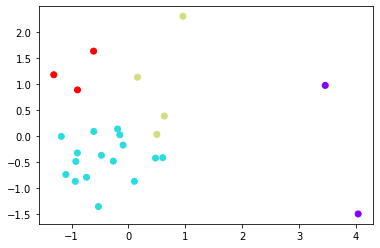

In [21]:
# x,y 좌표는 pca한 값 사용, 색 구분은 clustering 사용
plt.scatter(data_pca[0],data_pca[1],c=data_with_clusters['Clusters'],cmap='rainbow')

In [22]:
data_iloc = data_with_clusters.iloc[:,1:5]
data_iloc.head()

,dog,parking_lot,park_width_per_person,Clusters
0,27180,61,3.81,3
1,20295,23,2.80,1
2,15346,36,5.93,1
3,26362,45,3.82,3
4,21199,20,3.59,1


In [23]:
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

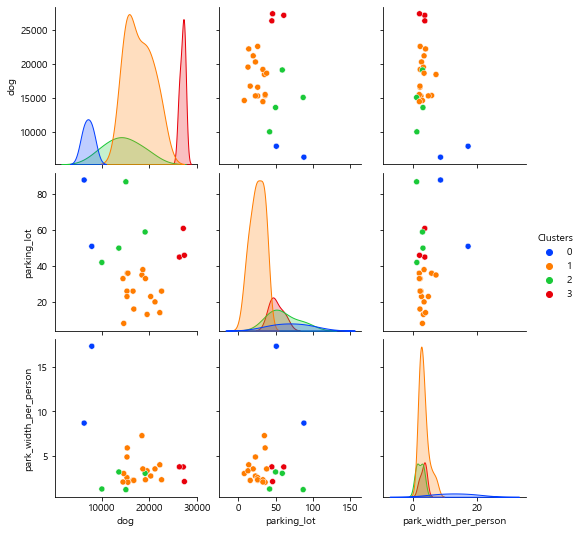

In [24]:
#pairplot with Seaborn
sns.pairplot(data_iloc,hue='Clusters',palette='bright')
plt.show()